# Tracé des surfaces S(U,V) et U(S,V) pour GP et vdW

On a démontré que $S$ est une fonction concave de $U$ et $V$ et que U est une fonction convexe de $S$ et $V$. 

On utilise les équations d'état du gaz parfait et de van der Waals pour tracer ces surfaces. Pour van der Waals, on voit les zones d'instabilité qui correspondent aux domaines biphasés. 

## Equation d'état de Van der Waals

L'équation d'état de Van der Waals est donnée par :

$$(p+a\frac{n^2}{V^2})(V-bn)=nRT$$

$a$ et $b$ sont des paramètres du gaz. 

Au point critique, le gaz est à $T_c$ et $p_c$, et une mole occupe le volume critique molaire $V_c$

$$V_c=3b$$

$$p_c=\frac{a}{27b^2}$$

$$T_c=\frac{8a}{27 R b}$$

Pour une mole de fluide, l'équation d'état devient:
$$p=\frac{RT}{V-b}-\frac{a}{V^2}$$

En coordonnées normalisées aux valeurs critiques, $p^*=p/p_c$; $T^*=T/T_c$ et $V^*=V/V_c$ et pour une mole

$$p^*=\frac{8T^*}{3V^*-1}-\frac{3}{V^{*2}}$$

In [1]:
from ipywidgets import interact
import numpy as np
import pandas as pd
import csv
from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import bokeh
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models.glyphs import Patch
output_notebook()



Loading BokehJS ...

In [2]:
#Constante des gaz parfaite
R=8.314

# paramètres a et b pour certains gaz
# gaz=(a,b) a en l^2.bar.mol^(-2) et b en l.mol^(-1)

co2=(3.64,0.04267)
sf6=(7.857,0.08786)
h2o=(5.537,0.03049)


# valcrit(gaz) =(Tc,Pc,Vc) en unités SI et pour une mole
# Calcule les valeurs critiques grâce à a et b

def valcrit(gaz):
    valcrit=(100*8*gaz[0]/(27*R*gaz[1]),10**5*gaz[0]/(27*gaz[1]**2),3*gaz[1]/10**3)
    return valcrit

# Tracé des surfaces S(U,V) et U(S,V) pour GP et vdW

Pour un gaz parfait 
$$dU=TdS-pdV=cNRdT$$. 
$$dS=cNR\frac{dT}{T}+\frac{p}{T}dV =
cNR\frac{dT}{T}+NR\frac{dV}{V}$$ 

$$S-S_0 =NR\ln\Big[\Big(\frac{U}{U_0}\Big)^c\cdot\Big(\frac{V}{V_0}\Big)\Big]$$

Cette forme est la même que l'équation de Sakur-Tetrode dérivée avec des considérations de phy stat sur un modèle de GP pour un gaz monoatomique (c=3/2). Elle ne fonctionne pas à très basse température. 

$$
\frac{S}{k_{\rm B} N} = \ln
\left[ \frac VN \left(\frac{4\pi m}{3h^2}\frac UN\right)^{3/2}\right]+
{\frac 52}
$$

Et donc aussi

$$U =U_0\Big(\frac{V}{V_0}\Big)^{-1/c}\exp\big({\frac{S-S_0}{cNR}}\big)$$



In [49]:
# définition de S(U,V) pour un gaz parfait
def suvgp(U,V):
    c=3/2 #GP monoatomique
    S0=0
    N=1
    R=8.31
    fonc = S0+np.log(U**c*V)
    return fonc

In [31]:
# définition de U(S,V) pour un gaz parfait
def usvgp(S,V):
    c=3/2 #GP monoatomique
    S0=0
    N=1
    R=8.31
    en_int_rel = V**(-1/c) * np.exp((S-S0)/(c*N*R))
    return en_int_rel

In [64]:
Utab = np.linspace(10,80,101)
Vtab1 = np.linspace(2,101,91)
Vtab = [round(x, 2) for x in Vtab1]
SUVGPtab = []
    
for i in Utab:
    SUVGPtab.append(suvgp(i,Vtab).tolist())
    
df_suvgp = pd.DataFrame(SUVGPtab,columns=Vtab, index=Utab)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [61]:
Stab1 = np.linspace(70,80,101)
Stab = [round(x, 2) for x in Stab1]
Vtab = np.linspace(2,11,91)
USVGPtab = []
for i in Stab:
    USVGPtab.append(usvgp(i,Vtab).tolist())
    
df_usvgp = pd.DataFrame(USVGPtab,columns=Vtab, index=Stab)      

<IPython.core.display.Javascript object>


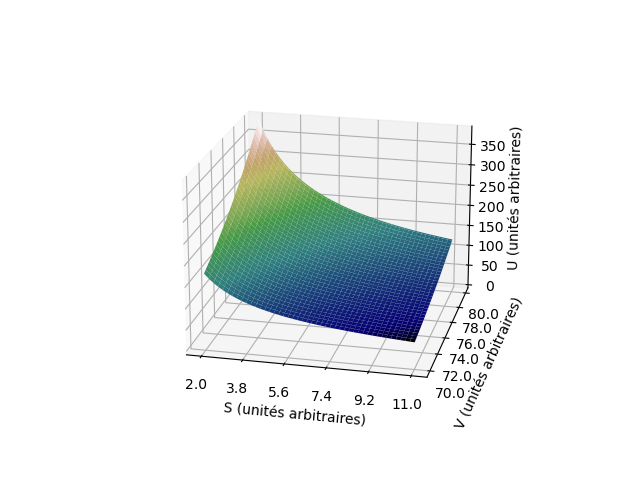

In [62]:
%matplotlib notebook

def plottable_3d_info(df_usvgp: pd.DataFrame):
    """
    Transform Pandas data into a format that's compatible with
    Matplotlib's surface and wireframe plotting.
    """
    index = df_usvgp.index
    columns = df_usvgp.columns

    x, y = np.meshgrid(np.arange(len(columns)), np.arange(len(index)))
    z = np.array([[df_usvgp[c][i] for c in columns] for i in index])
    
    xticks = dict(ticks=np.linspace(0, len(columns) - 1, 6), labels=columns[::len(columns) // 5])
    yticks = dict(ticks=np.linspace(0, len(index) - 1, 6), labels=index[::len(index) // 5])
    
    return x, y, z, xticks, yticks


### Transform to Matplotlib friendly format.
x, y, z, xticks, yticks = plottable_3d_info(df_usvgp)

### Set up axes and put data on the surface.
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(x, y, z, cmap='gist_earth')

### Customize labels and ticks (only really necessary with
### non-numeric axes).
axes.set_xlabel('S (unités arbitraires)')
axes.set_ylabel('V (unités arbitraires)')
axes.set_zlabel('U (unités arbitraires)')
axes.set_zlim3d(bottom=0)
axes.view_init(elev=20, azim=-77)
plt.xticks(**xticks)
plt.yticks(**yticks)

plt.show()

<IPython.core.display.Javascript object>


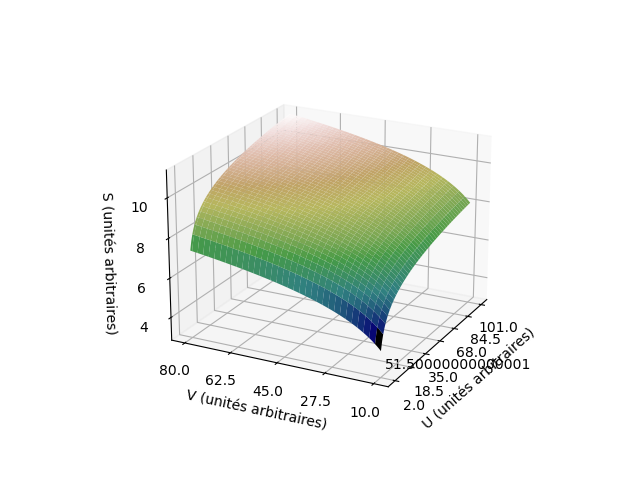

In [63]:
%matplotlib notebook

def plottable_3d_info(df_suvgp: pd.DataFrame):
    """
    Transform Pandas data into a format that's compatible with
    Matplotlib's surface and wireframe plotting.
    """
    index = df_suvgp.index
    columns = df_suvgp.columns

    x, y = np.meshgrid(np.arange(len(columns)), np.arange(len(index)))
    z = np.array([[df_suvgp[c][i] for c in columns] for i in index])
    
    xticks = dict(ticks=np.linspace(0, len(columns) - 1, 7), labels=columns[::len(columns) // 6])
    yticks = dict(ticks=np.linspace(0, len(index) - 1, 5), labels=index[::len(index) // 4])
    
    return x, y, z, xticks, yticks


### Transform to Matplotlib friendly format.
x, y, z, xticks, yticks = plottable_3d_info(df_suvgp)

### Set up axes and put data on the surface.
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(x, y, z, cmap='gist_earth')

### Customize labels and ticks (only really necessary with
### non-numeric axes).
axes.set_xlabel('U (unités arbitraires)')
axes.set_ylabel('V (unités arbitraires)')
axes.set_zlabel('S (unités arbitraires)')
axes.set_zlim3d(bottom=3)
axes.view_init(elev=21, azim=-153)
plt.xticks(**xticks)
plt.yticks(**yticks)

plt.show()

Notebook by Cécile Hébert (2023).
Except where otherwise noted, the content of this notebook is licensed under MIT licence.